#  GammaRegressor ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('TCS1.csv',usecols=["Open","High","Low","Volume","Close"])
df.head()

,Open,High,Low,Close,Volume
0,122.800003,122.800003,119.820000,120.332497,30646000.0
1,121.237503,123.750000,120.625000,123.345001,24465208.0
2,123.312500,123.750000,122.000000,123.512497,21194656.0
3,123.750000,124.375000,122.949997,123.487503,19935544.0
4,123.737503,125.574997,123.250000,124.207497,21356352.0


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [5]:
df.tail()

,Open,High,Low,Close,Volume
4489,3150.000000,3155.350098,3128.550049,3144.699951,1793722.0
4490,3159.000000,3159.000000,3112.000000,3121.850098,1194289.0
4491,3105.000000,3160.000000,3105.000000,3157.300049,1587601.0
4492,3157.800049,3160.399902,3127.000000,3137.399902,1021913.0
4493,3170.100098,3178.000000,3155.000000,3161.699951,260949.0


In [6]:
x = df.drop(labels='Close', axis=1)
y = df.loc[:,'Close']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  3588
NUMBER OF TEST DATASET      :  898
TOTAL NUMBER OF DATASET    :  4486


In [8]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  3588
NUMBER OF TEST DATASET      :  898
TOTAL NUMBER OF DATASET    :  4486


In [9]:
from sklearn.linear_model import GammaRegressor

In [10]:
GR = GammaRegressor()
GR.fit(x_train,y_train)

GammaRegressor()

In [11]:
predicted = GR.predict(x_test)

In [12]:
from sklearn.metrics import rand_score
RS = rand_score(y_test, predicted)
print("MEAN RAND SCORE OF GammaRegressor",RS*100)

MEAN RAND SCORE OF GammaRegressor 0.0004965822725094537


In [13]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predicted)
print("MEAN R2 SCORE OF GammaRegressor",R2*100)

MEAN R2 SCORE OF GammaRegressor -0.027973119511703892


In [14]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predicted)
print("MEAN SQUARE ERROR OF GammaRegressor",MSE)

MEAN SQUARE ERROR OF GammaRegressor 1019594.5398176238


In [15]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, predicted, squared=False)
print(" ROOT MEAN SQUARE ERROR OF GammaRegressor",RMSE)

 ROOT MEAN SQUARE ERROR OF GammaRegressor 1009.7497411822515


In [16]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predicted)
print("MEAN ABSOLUTE ERROR OF GammaRegressor",MAE)

MEAN ABSOLUTE ERROR OF GammaRegressor 800.3938234934029


In [17]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test, predicted)
print("EXPLAINED VARIANCE SCORE OF GammaRegressor",EVS)

EXPLAINED VARIANCE SCORE OF GammaRegressor 0.0


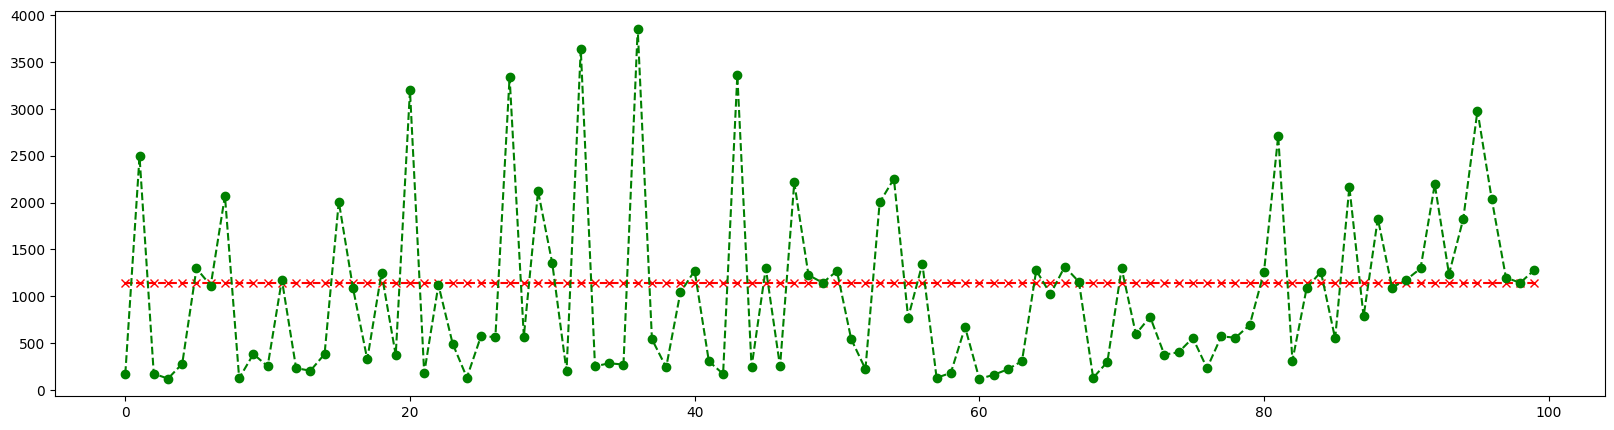

In [18]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()